In [14]:
import mglearn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import sklearn

In [2]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm
import seaborn as sns

for font_path in fm.findSystemFonts(fontpaths = None, fontext = 'ttf'):
    if 'D2Coding' in font_path:
        font = font_manager.FontProperties(fname=font_path).get_name()
        rc('font', family=font)
        break 

# 교차 검증(Cross Validation)

> 머신러닝을 할 때, 보통 Train set로 모델을 훈련, test set로 모델을 검증한다.  
여기에는 한 가지 약점이 존재하는데,  
고정된 test set를 통해 모델의 성능을 검증하고 수정하는 과정을 반복하면, 결국 내가 만든 모델은 test set에만 잘 동작하는 모델이 된다.  

>결국 test set에 overfitting하게 되므로, 다른 실제 데이터를 가져와도 예측을 수행하면 틀리는 상황이 자주 발생하게 된다.  
이를 해결하고자 하는 것이 교차 검증이다.

## 교차 검증 프로세스

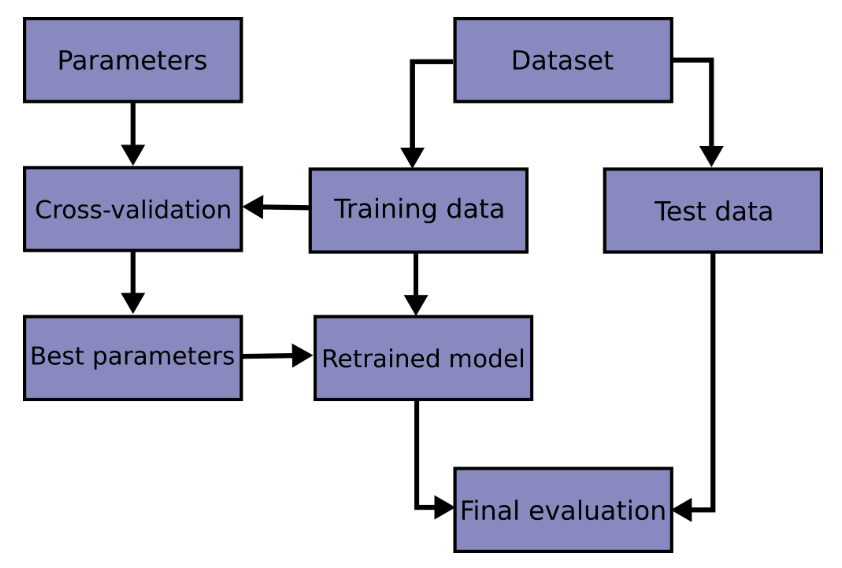

## 교차 검증의 장단점

- 장점
    - 모든 데이터셋을 훈련에 활용할 수 있다.
        - 정확도를 향상시킬 수 있다.
        - 데이터 부족으로 인한 underfitting을 방지할 수 있다.
    - 모든 데이터셋을 평가에 활용할 수 있다.
        - 평가에 사용되는 데이터 편중을 막을 수 있다.
        - 더 일반화된 모델을 만들 수 있다.
- 단점
    - iteration 횟수가 많기 때문에 시간이 오래 걸린다.


## 교차 검증 기법 종류

### K-fold cross validation

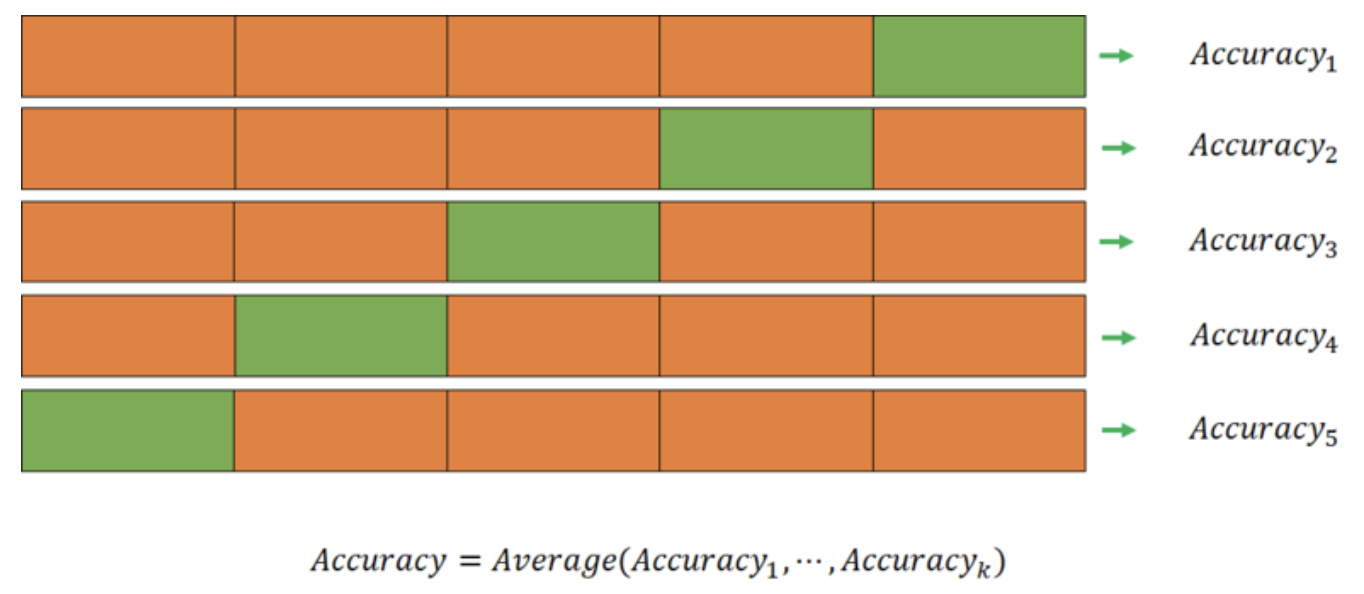

### Stratified k-fold cross validation

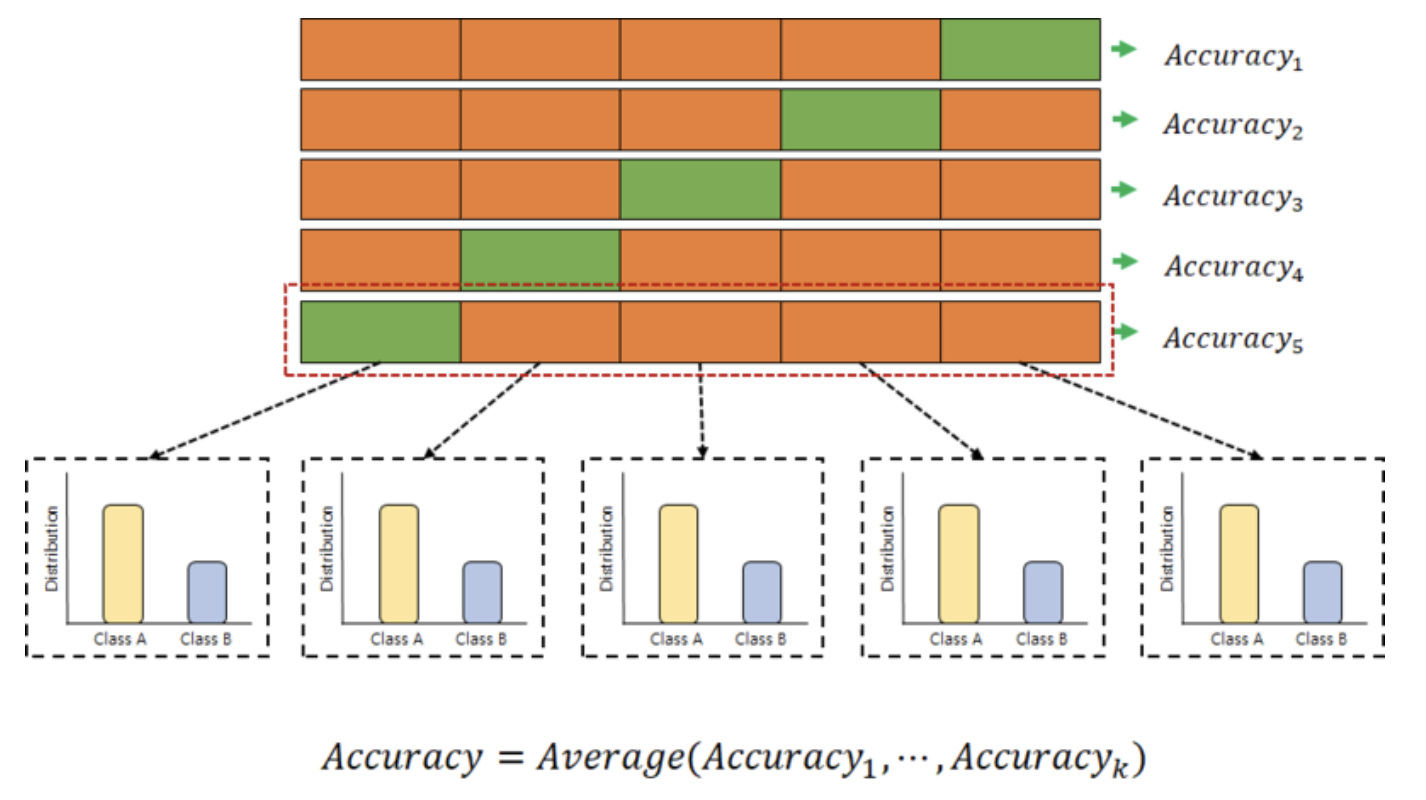

## 교차 검증 예제

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

### KFold

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [9]:
clf = svm.SVC(kernel='linear', C=1)

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [12]:
n_iter = 0
accuracy_lst = []
for train_index, valid_index in kf.split(X_train):
    n_iter += 1
    train_x, valid_x = X_train[train_index], X_train[valid_index]
    train_y, valid_y = y_train[train_index], y_train[valid_index]
    clf.fit(train_x, train_y)
    pred = clf.predict(valid_x)
    accuracy = np.round(accuracy_score(valid_y, pred), 4)
    accuracy_lst.append(accuracy)
    print(f"{n_iter}번째 K-Fold 정확도: {accuracy} / 학습데이터 크기: {train_x.shape} / 검증데이터 크기: {valid_x.shape}")

print("-"*50)
print(f"교차 검증 정확도: {np.mean(accuracy_lst)} / 모델 평가: {clf.score(X_test, y_test)}")

1번째 K-Fold 정확도: 1.0 / 학습데이터 크기: (72, 4) / 검증데이터 크기: (18, 4)
2번째 K-Fold 정확도: 0.9444 / 학습데이터 크기: (72, 4) / 검증데이터 크기: (18, 4)
3번째 K-Fold 정확도: 0.9444 / 학습데이터 크기: (72, 4) / 검증데이터 크기: (18, 4)
4번째 K-Fold 정확도: 1.0 / 학습데이터 크기: (72, 4) / 검증데이터 크기: (18, 4)
5번째 K-Fold 정확도: 1.0 / 학습데이터 크기: (72, 4) / 검증데이터 크기: (18, 4)
--------------------------------------------------
교차 검증 정확도: 0.97776 / 모델 평가: 0.9666666666666667


### StratifiedKFold

In [15]:
from sklearn.model_selection import StratifiedKFold

In [16]:
df_train = pd.DataFrame(data=X_train, columns=iris.feature_names)
df_train["label"] = y_train
df_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,6.0,3.4,4.5,1.6,1
1,4.8,3.1,1.6,0.2,0
2,5.8,2.7,5.1,1.9,2
3,5.6,2.7,4.2,1.3,1
4,5.6,2.9,3.6,1.3,1
...,...,...,...,...,...
85,4.9,3.1,1.5,0.1,0
86,6.3,2.9,5.6,1.8,2
87,5.8,2.7,4.1,1.0,1
88,7.7,3.8,6.7,2.2,2


In [17]:
clf = svm.SVC(kernel="linear", C=1)

In [19]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [37]:
n_iter = 0
accuracy_lst = []
for train_index, valid_index in skf.split(df_train, df_train["label"]):
    n_iter += 1
    label_train = df_train['label'].iloc[train_index]
    label_valid = df_train['label'].iloc[valid_index]
    train_x, valid_x = X_train[train_index], X_train[valid_index]
    train_y, valid_y = y_train[train_index], y_train[valid_index]
    clf.fit(train_x, train_y)
    pred = clf.predict(valid_x)
    accuracy = np.round(accuracy_score(valid_y, pred), 4)
    accuracy_lst.append(accuracy)
    print(f'{n_iter} 번째 Stratified Stratified K-Fold 정확도: {accuracy},\n학습데이터 label 분포: \n{label_train.value_counts()},\n검증데이터 label 분포: \n{label_valid.value_counts()}')

print("-"*50)
print(f"교차 검증 정확도: {np.mean(accuracy_lst)} / 모델 평가: {clf.score(X_test, y_test)}")

1 번째 Stratified Stratified K-Fold 정확도: 1.0,
학습데이터 label 분포: 
0    27
2    24
1    21
Name: label, dtype: int64,
검증데이터 label 분포: 
0    7
1    6
2    5
Name: label, dtype: int64
2 번째 Stratified Stratified K-Fold 정확도: 1.0,
학습데이터 label 분포: 
0    28
2    23
1    21
Name: label, dtype: int64,
검증데이터 label 분포: 
1    6
0    6
2    6
Name: label, dtype: int64
3 번째 Stratified Stratified K-Fold 정확도: 1.0,
학습데이터 label 분포: 
0    27
2    23
1    22
Name: label, dtype: int64,
검증데이터 label 분포: 
0    7
2    6
1    5
Name: label, dtype: int64
4 번째 Stratified Stratified K-Fold 정확도: 0.9444,
학습데이터 label 분포: 
0    27
2    23
1    22
Name: label, dtype: int64,
검증데이터 label 분포: 
0    7
2    6
1    5
Name: label, dtype: int64
5 번째 Stratified Stratified K-Fold 정확도: 1.0,
학습데이터 label 분포: 
0    27
2    23
1    22
Name: label, dtype: int64,
검증데이터 label 분포: 
0    7
2    6
1    5
Name: label, dtype: int64
--------------------------------------------------
교차 검증 정확도: 0.98888 / 모델 평가: 0.8833333333333333


### cross_val_predict()
> 만든 모델을 통해 예측한 값들을 불러와 원하는 평가 계산방법을 적용할 수 있도록 사용

In [23]:
from sklearn.model_selection import cross_val_predict

In [26]:
clf = svm.SVC(kernel="linear", C=1)
predicts = cross_val_predict(clf, X_train, y_train, cv=5)
print(f"각 예측 결과값:\n{pd.Series(predicts)}")

각 예측 결과값:
0     1
1     0
2     2
3     1
4     1
     ..
85    0
86    2
87    1
88    2
89    0
Length: 90, dtype: int32


### cross_val_score()
> 평가지표로 계산된 스코어에 대한 정보들을 확인하는 방법

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
clf = svm.SVC(kernel="linear", C=1)
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
print(f"각 검증 별 점수: \n{pd.Series(scores)}")
print(f"교차 검증 평균 점수: {np.mean(scores)}")

각 검증 별 점수: 
0    1.000000
1    1.000000
2    1.000000
3    1.000000
4    0.944444
dtype: float64
교차 검증 평균 점수: 0.9888888888888889


### cross_validate()
> 여러 개의 평가지표를 사용하고 싶을 때 사용

In [29]:
from sklearn.model_selection import cross_validate

In [33]:
clf = svm.SVC(kernel="linear", C=1)
result = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=5, return_train_score=True)
print(f"각 검증 별 점수: \n{pd.DataFrame(result)}")

각 검증 별 점수: 
   fit_time  score_time  test_score  train_score
0  0.001987    0.000781    1.000000     0.986111
1  0.001051    0.000000    1.000000     1.000000
2  0.000000    0.001004    1.000000     0.986111
3  0.000997    0.000000    1.000000     0.986111
4  0.001000    0.000000    0.944444     1.000000
